In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

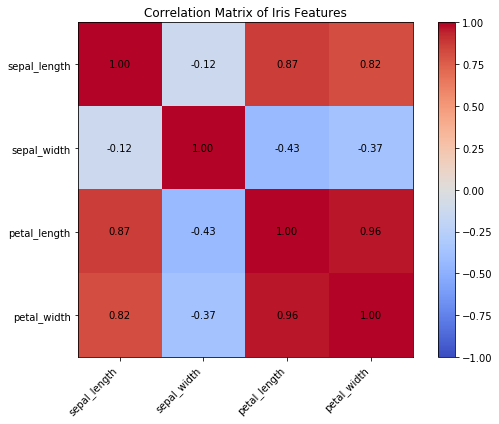

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

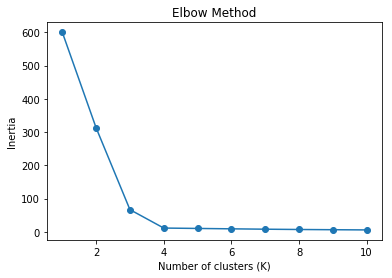

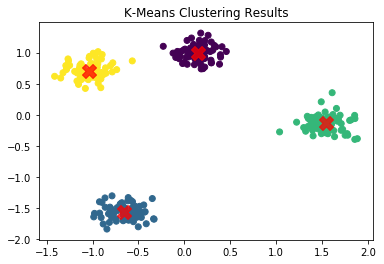

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 데이터 생성 및 스케일링
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 최적의 K 찾기 (엘보우 방법)
inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show() # 그래프에서 K=4가 최적임을 확인

# 3. K-Means 모델 학습 및 예측
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# 4. 결과 시각화
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering Results')
plt.show()

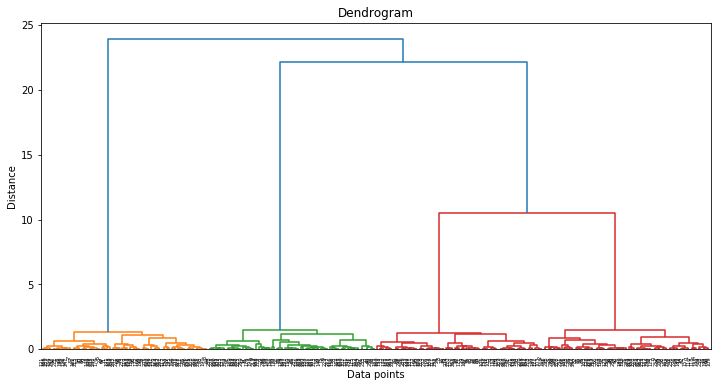

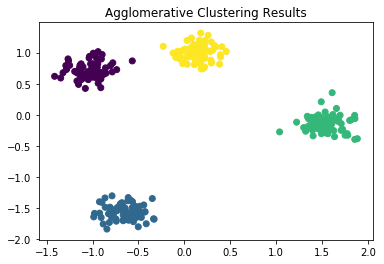

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 1. 덴드로그램 시각화
# linkage_matrix = linkage(데이터, method='연결방법')
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# 2. AgglomerativeClustering 모델 학습
# 덴드로그램을 보고 적절한 군집 수(n_clusters)를 결정
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(X_scaled)

# 3. 결과 시각화
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering Results')
plt.show()

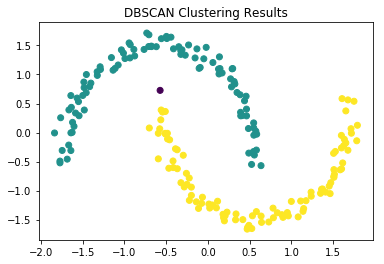

군집 레이블 종류: [-1  0  1]


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# 1. 데이터 생성 (복잡한 형태)
X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=42)
X_moon_scaled = StandardScaler().fit_transform(X_moon)

# 2. DBSCAN 모델 학습
# eps: 이웃을 찾기 위한 거리
# min_samples: 군집을 형성하기 위한 최소 샘플 수
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_moon_scaled) # -1은 노이즈(이상치)를 의미

# 3. 결과 시각화
plt.scatter(X_moon_scaled[:, 0], X_moon_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.show()

print("군집 레이블 종류:", np.unique(dbscan_labels))

In [10]:
from sklearn.metrics import silhouette_score, silhouette_samples

# K-Means 결과로 실루엣 계수 계산
score = silhouette_score(X_scaled, cluster_labels)
print(f"K-Means Silhouette Score: {score:.3f}")

K-Means Silhouette Score: 0.839


In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# 1. 데이터 준비 (리스트의 리스트 형태)
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# 2. 데이터를 트랜잭션 형태로 변환
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("--- Transaction Data ---")
print(df)

--- Transaction Data ---
   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


In [18]:
# 3. Apriori 알고리즘을 이용해 빈번한 항목 집합 찾기
# min_support: 최소 지지도.
# use_colnames=True: 항목 이름을 컬럼명으로 사용.
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("\n--- Frequent Itemsets (min_support >= 0.6) ---")
print(frequent_itemsets)

# 4. 연관 규칙 생성
# metric: 규칙을 필터링할 기준 ('confidence', 'lift' 등).
# min_threshold: metric의 최소 임계값.
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\n--- Association Rules (min_confidence >= 0.7) ---")
# antecedents: 선행 항목, consequents: 후행 항목
# antecedent support, consequent support: 각 항목 집합의 지지도
# support, confidence, lift: 규칙의 지지도, 신뢰도, 향상도
# leverage, conviction: 다른 연관성 척도
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


--- Frequent Itemsets (min_support >= 0.6) ---
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Eggs, Kidney Beans)

--- Association Rules (min_confidence >= 0.7) ---
              antecedents            consequents  support  confidence  lift
0                  (Eggs)         (Kidney Beans)      0.8        1.00  1.00
1          (Kidney Beans)                 (Eggs)      0.8        0.80  1.00
2                 (Onion)                 (Eggs)      0.6        1.00  1.25
3                  (Eggs)                (Onion)      0.6        0.75  1.25
4                  (Milk)    

In [19]:
# FP-Growth 알고리즘으로 빈번항목집합 찾기
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
print("\n--- Frequent Itemsets (min_support >= 0.6) ---")
print(frequent_itemsets)
'''
    support                     itemsets
0       1.0               (Kidney Beans)
1       0.8                       (Eggs)
2       0.6                     (Yogurt)
3       0.6                      (Onion)
4       0.6                       (Milk)
5       0.8         (Eggs, Kidney Beans)
6       0.6       (Yogurt, Kidney Beans)
7       0.6                (Onion, Eggs)
8       0.6        (Onion, Kidney Beans)
9       0.6  (Onion, Eggs, Kidney Beans)
10      0.6         (Milk, Kidney Beans)
'''

# 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\n--- Association Rules (min_confidence >= 0.7) ---")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
'''
              antecedents            consequents  support  confidence  lift
0                  (Eggs)         (Kidney Beans)      0.8        1.00  1.00
1          (Kidney Beans)                 (Eggs)      0.8        0.80  1.00
2                (Yogurt)         (Kidney Beans)      0.6        1.00  1.00
3                 (Onion)                 (Eggs)      0.6        1.00  1.25
4                  (Eggs)                (Onion)      0.6        0.75  1.25
5                 (Onion)         (Kidney Beans)      0.6        1.00  1.00
6           (Onion, Eggs)         (Kidney Beans)      0.6        1.00  1.00
7   (Onion, Kidney Beans)                 (Eggs)      0.6        1.00  1.25
8    (Eggs, Kidney Beans)                (Onion)      0.6        0.75  1.25
9                 (Onion)   (Eggs, Kidney Beans)      0.6        1.00  1.25
10                 (Eggs)  (Onion, Kidney Beans)      0.6        0.75  1.25
11                 (Milk)         (Kidney Beans)      0.6        1.00  1.00
'''


--- Frequent Itemsets (min_support >= 0.6) ---
    support                     itemsets
0       1.0               (Kidney Beans)
1       0.8                       (Eggs)
2       0.6                     (Yogurt)
3       0.6                      (Onion)
4       0.6                       (Milk)
5       0.8         (Eggs, Kidney Beans)
6       0.6       (Yogurt, Kidney Beans)
7       0.6                (Onion, Eggs)
8       0.6        (Onion, Kidney Beans)
9       0.6  (Onion, Eggs, Kidney Beans)
10      0.6         (Milk, Kidney Beans)

--- Association Rules (min_confidence >= 0.7) ---
              antecedents            consequents  support  confidence  lift
0                  (Eggs)         (Kidney Beans)      0.8        1.00  1.00
1          (Kidney Beans)                 (Eggs)      0.8        0.80  1.00
2                (Yogurt)         (Kidney Beans)      0.6        1.00  1.00
3                 (Onion)                 (Eggs)      0.6        1.00  1.25
4                  (Eggs)    

'\n              antecedents            consequents  support  confidence  lift\n0                  (Eggs)         (Kidney Beans)      0.8        1.00  1.00\n1          (Kidney Beans)                 (Eggs)      0.8        0.80  1.00\n2                 (Onion)                 (Eggs)      0.6        1.00  1.25\n3                  (Eggs)                (Onion)      0.6        0.75  1.25\n4                  (Milk)         (Kidney Beans)      0.6        1.00  1.00\n5                 (Onion)         (Kidney Beans)      0.6        1.00  1.00\n6                (Yogurt)         (Kidney Beans)      0.6        1.00  1.00\n7           (Onion, Eggs)         (Kidney Beans)      0.6        1.00  1.00\n8   (Onion, Kidney Beans)                 (Eggs)      0.6        1.00  1.25\n9    (Eggs, Kidney Beans)                (Onion)      0.6        0.75  1.25\n10                (Onion)   (Eggs, Kidney Beans)      0.6        1.00  1.25\n11                 (Eggs)  (Onion, Kidney Beans)      0.6        0.75  1.

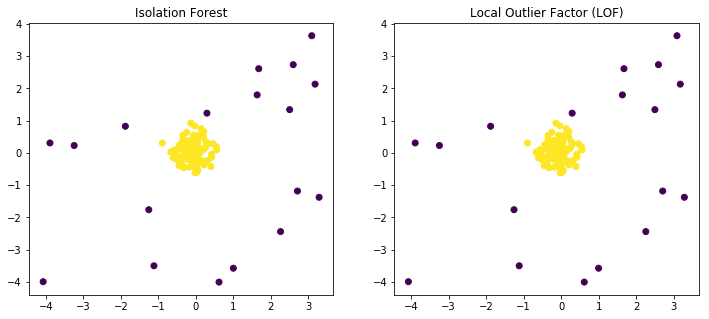

Isolation Forest가 탐지한 이상치 개수: 18
LOF가 탐지한 이상치 개수: 18


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# 1. 데이터 생성 (정상 데이터와 이상치)
np.random.seed(42)
X_normal = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_normal, X_outliers]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Isolation Forest
# 주요 하이퍼파라미터
# n_estimators: 생성할 트리의 개수.
# contamination: 데이터 내 이상치의 비율.
# max_samples: 각 트리를 훈련할 때 사용할 샘플의 비율 또는 개수.
iso_forest = IsolationForest(n_estimators=100, contamination=0.15, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_scaled) # 예측 결과: 1(정상), -1(이상치)

# 3. Local Outlier Factor (LOF)
# 주요 하이퍼파라미터
# n_neighbors: 이웃의 수 (K).
# contamination: 데이터 내 이상치의 비율.
# novelty=True로 설정하면, fit()으로 학습 후 새로운 데이터에 대해 predict() 가능
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.15)
y_pred_lof = lof.fit_predict(X_scaled) # 예측 결과: 1(정상), -1(이상치)

# 4. 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_iso, cmap='viridis')
plt.title('Isolation Forest')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_lof, cmap='viridis')
plt.title('Local Outlier Factor (LOF)')

plt.show()

print("Isolation Forest가 탐지한 이상치 개수:", np.sum(y_pred_iso == -1))
print("LOF가 탐지한 이상치 개수:", np.sum(y_pred_lof == -1))

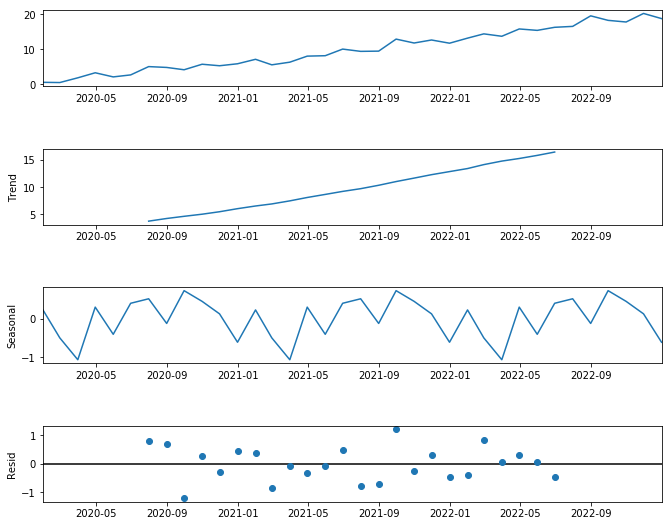

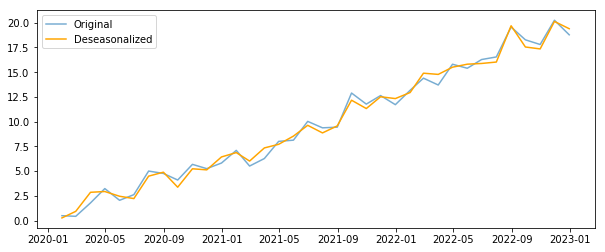

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터 생성 (예시)
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
data = np.random.randn(len(date_rng)) + np.linspace(0, 20, len(date_rng)) # 추세 추가
ts = pd.Series(data, index=date_rng)

# 시계열 분해
# model: 'additive' 또는 'multiplicative'
decomposition = seasonal_decompose(ts, model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# 각 구성 요소 접근
observed = decomposition.observed     # 원본 시계열
trend = decomposition.trend           # 추세 (Trend)
seasonal = decomposition.seasonal     # 계절성 (Seasonality)
resid = decomposition.resid           # 불규칙(잔차, Residual)

# 계절성 제거(비계절화 시계열)
deseasonalized = observed - seasonal

# 추세 제거(중심화)
detrended = observed - trend

# 불규칙 성분만 보기
resid_only = resid.dropna()

# 결과 확인
plt.figure(figsize=(10, 4))
plt.plot(observed, label='Original', alpha=0.6)
plt.plot(deseasonalized, label='Deseasonalized', color='orange')
plt.legend()
plt.show()

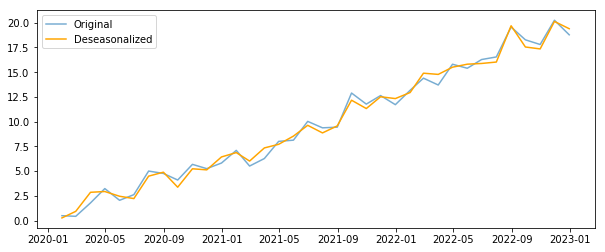

In [28]:
decomposition.trend

2020-01-31          NaN
2020-02-29          NaN
2020-03-31          NaN
2020-04-30          NaN
2020-05-31          NaN
2020-06-30          NaN
2020-07-31     3.713912
2020-08-31     4.200767
2020-09-30     4.599378
2020-10-31     4.985060
2020-11-30     5.437155
2020-12-31     5.998988
2021-01-31     6.489631
2021-02-28     6.866602
2021-03-31     7.427839
2021-04-30     8.047883
2021-05-31     8.609421
2021-06-30     9.163013
2021-07-31     9.661718
2021-08-31    10.284724
2021-09-30    10.964408
2021-10-31    11.598833
2021-11-30    12.226519
2021-12-31    12.789874
2022-01-31    13.348819
2022-02-28    14.069035
2022-03-31    14.714856
2022-04-30    15.189990
2022-05-31    15.758214
2022-06-30    16.369597
2022-07-31          NaN
2022-08-31          NaN
2022-09-30          NaN
2022-10-31          NaN
2022-11-30          NaN
2022-12-31          NaN
Freq: M, Name: trend, dtype: float64

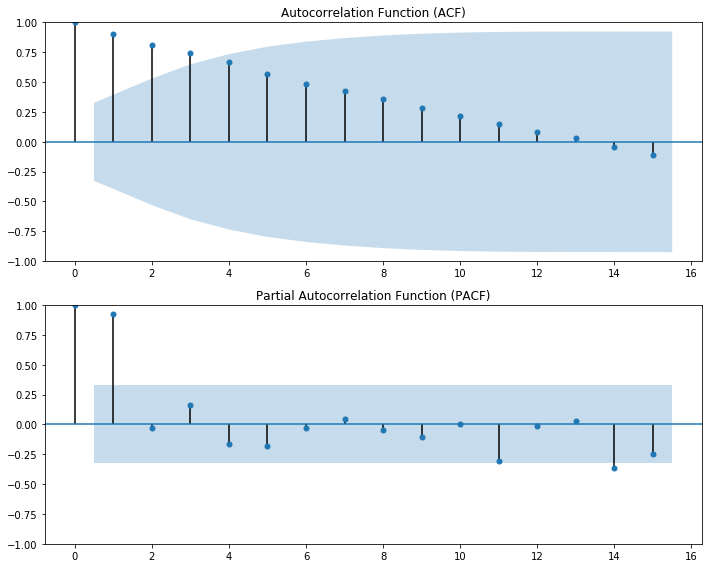

In [33]:
# ACF 및 PACF 플롯
# lags: 확인할 시차의 수
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts, lags=15, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')
plot_pacf(ts, lags=15, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

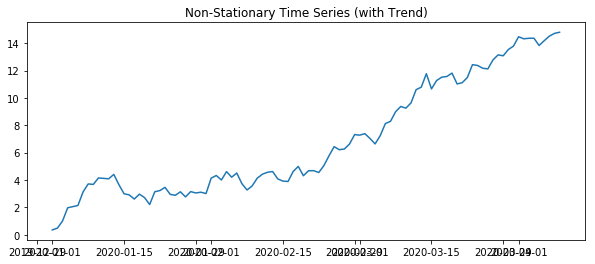

--- 비정상 시계열에 대한 ADF 검정 결과 ---
ADF Statistic: 0.027081
p-value: 0.960715
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
귀무가설 채택 (p-value > 0.05): 시계열은 비정상 시계열입니다.


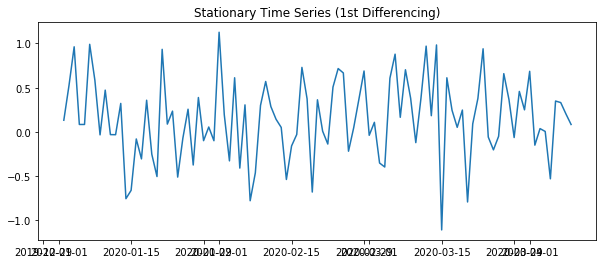


--- 1차 차분 후 시계열에 대한 ADF 검정 결과 ---
ADF Statistic: -10.008881
p-value: 0.000000
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
귀무가설 기각 (p-value <= 0.05): 시계열은 정상성을 만족합니다.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. 비정상 시계열 데이터 생성 (추세 포함)
np.random.seed(42)
n_samples = 100
data_trend = np.cumsum(np.random.randn(n_samples) * 0.5 + 0.1) + np.linspace(0, 10, n_samples)
ts_non_stationary = pd.Series(data_trend, index=pd.date_range(start='2020-01-01', periods=n_samples, freq='D'))

plt.figure(figsize=(10, 4))
plt.plot(ts_non_stationary)
plt.title('Non-Stationary Time Series (with Trend)')
plt.show()

# 2. ADF 검정 수행 (비정상 시계열)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("귀무가설 기각 (p-value <= 0.05): 시계열은 정상성을 만족합니다.")
    else:
        print("귀무가설 채택 (p-value > 0.05): 시계열은 비정상 시계열입니다.")

print("--- 비정상 시계열에 대한 ADF 검정 결과 ---")
adf_test(ts_non_stationary)

# 3. 1차 차분 수행하여 정상 시계열로 변환
ts_stationary = ts_non_stationary.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(ts_stationary)
plt.title('Stationary Time Series (1st Differencing)')
plt.show()

# 4. ADF 검정 수행 (정상 시계열)
print("\n--- 1차 차분 후 시계열에 대한 ADF 검정 결과 ---")
adf_test(ts_stationary)

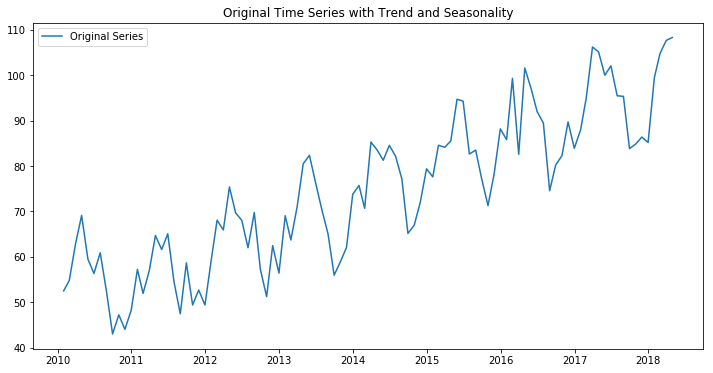

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# 시계열 데이터 생성 (추세와 계절성 포함)
np.random.seed(42)
dates = pd.date_range(start='2010-01-01', periods=100, freq='M')
data = 50 + np.arange(100) * 0.5 + 10 * np.sin(np.arange(100) * 2 * np.pi / 12) + np.random.randn(100) * 5
ts = pd.Series(data, index=dates)

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.title('Original Time Series with Trend and Seasonality')
plt.legend()
plt.show()

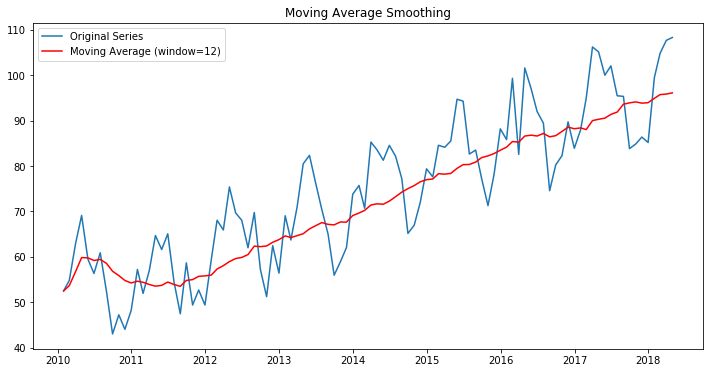

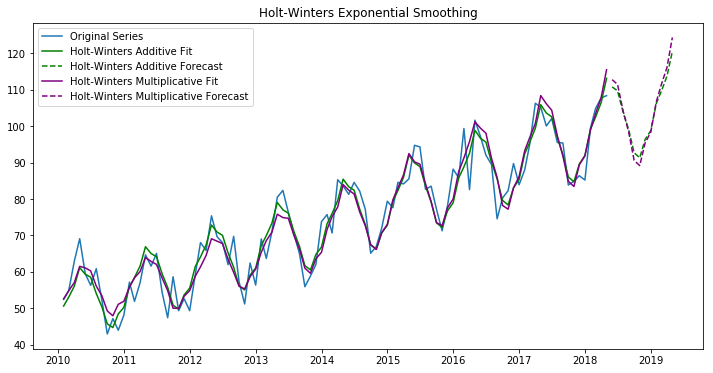


Holt-Winters Additive 모델 파라미터:
{'smoothing_level': 1.490357349396311e-08, 'smoothing_trend': 1.5506792541277399e-09, 'smoothing_seasonal': 4.850882288481234e-12, 'damping_trend': nan, 'initial_level': 14.671240384966252, 'initial_trend': 0.0807837526975245, 'initial_seasons': array([ 0.02042151,  0.38784472,  0.85317308,  1.66441441,  1.27203734,
        1.04562588,  0.1677447 , -0.58222219, -1.55523605, -1.83619808,
       -1.1945736 , -0.93672545]), 'use_boxcox': True, 'lamda': 0.5724162939630206, 'remove_bias': False}

Holt-Winters Multiplicative 모델 파라미터:
{'smoothing_level': 0.0912122922388086, 'smoothing_trend': 1.8425392500126235e-10, 'smoothing_seasonal': 6.840362853146997e-11, 'damping_trend': nan, 'initial_level': 14.67643199210379, 'initial_trend': 1.0040662272089633, 'initial_seasons': array([1.02722424, 1.05081728, 1.07310395, 1.11457802, 1.09779285,
       1.08554122, 1.03722997, 0.99692778, 0.94395076, 0.93085346,
       0.96656962, 0.98074845]), 'use_boxcox': True, 'lamd

In [84]:
# 이동평균법 (Moving Average)
# window: 이동평균을 계산할 윈도우 크기.
# min_periods: 윈도우 내 최소 데이터 수.
ts_ma = ts.rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.plot(ts_ma, label='Moving Average (window=12)', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

# 지수평활법 (Holt-Winters)
# Holt-Winters' Seasonal Method 하이퍼파라미터
# seasonal_periods: 계절성 주기 (e.g., 월별 데이터면 12, 분기별이면 4)
# trend: 추세 유형 ('add' for additive, 'mul' for multiplicative)
# seasonal: 계절성 유형 ('add' for additive, 'mul' for multiplicative)
# smoothing_level (alpha): 수준 평활 계수.
# smoothing_trend (beta): 추세 평활 계수.
# smoothing_seasonal (gamma): 계절성 평활 계수.
#   - 이 계수들은 0과 1 사이의 값을 가지며, 1에 가까울수록 최근 데이터에 더 큰 가중치를 부여.
#   - 보통 fit() 메서드에서 자동으로 최적화된 값을 찾아줌.

# 덧셈 모델 (Additive Model)
fit_add = ExponentialSmoothing(ts, seasonal_periods=12, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
pred_add = fit_add.forecast(12) # 12개월 예측

# 곱셈 모델 (Multiplicative Model)
fit_mul = ExponentialSmoothing(ts, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
pred_mul = fit_mul.forecast(12) # 12개월 예측

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.plot(fit_add.fittedvalues, label='Holt-Winters Additive Fit', color='green')
plt.plot(pred_add, label='Holt-Winters Additive Forecast', color='green', linestyle='--')
plt.plot(fit_mul.fittedvalues, label='Holt-Winters Multiplicative Fit', color='purple')
plt.plot(pred_mul, label='Holt-Winters Multiplicative Forecast', color='purple', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

print("\nHolt-Winters Additive 모델 파라미터:")
print(fit_add.params)
print("\nHolt-Winters Multiplicative 모델 파라미터:")
print(fit_mul.params)

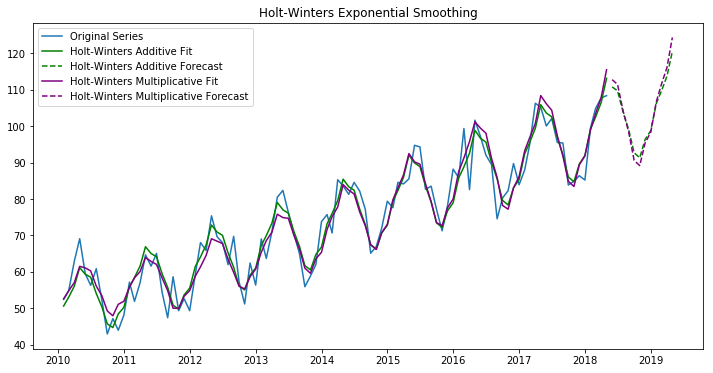


Holt-Winters Additive 모델 파라미터:
{'smoothing_level': 1.490357349396311e-08, 'smoothing_trend': 1.5506792541277399e-09, 'smoothing_seasonal': 4.850882288481234e-12, 'damping_trend': nan, 'initial_level': 14.671240384966252, 'initial_trend': 0.0807837526975245, 'initial_seasons': array([ 0.02042151,  0.38784472,  0.85317308,  1.66441441,  1.27203734,
        1.04562588,  0.1677447 , -0.58222219, -1.55523605, -1.83619808,
       -1.1945736 , -0.93672545]), 'use_boxcox': True, 'lamda': 0.5724162939630206, 'remove_bias': False}

Holt-Winters Multiplicative 모델 파라미터:
{'smoothing_level': 0.0912122922388086, 'smoothing_trend': 1.8425392500126235e-10, 'smoothing_seasonal': 6.840362853146997e-11, 'damping_trend': nan, 'initial_level': 14.67643199210379, 'initial_trend': 1.0040662272089633, 'initial_seasons': array([1.02722424, 1.05081728, 1.07310395, 1.11457802, 1.09779285,
       1.08554122, 1.03722997, 0.99692778, 0.94395076, 0.93085346,
       0.96656962, 0.98074845]), 'use_boxcox': True, 'lamd

In [82]:
# 덧셈 모델 (Additive Model)
fit_add = ExponentialSmoothing(ts, seasonal_periods=12, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
pred_add = fit_add.forecast(12) # 12개월 예측

# 곱셈 모델 (Multiplicative Model)
fit_mul = ExponentialSmoothing(ts, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
pred_mul = fit_mul.forecast(12) # 12개월 예측

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.plot(fit_add.fittedvalues, label='Holt-Winters Additive Fit', color='green')
plt.plot(pred_add, label='Holt-Winters Additive Forecast', color='green', linestyle='--')
plt.plot(fit_mul.fittedvalues, label='Holt-Winters Multiplicative Fit', color='purple')
plt.plot(pred_mul, label='Holt-Winters Multiplicative Forecast', color='purple', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

print("\nHolt-Winters Additive 모델 파라미터:")
print(fit_add.params)
print("\nHolt-Winters Multiplicative 모델 파라미터:")
print(fit_mul.params)